## Rice Type Classification using Machine Learning


#### Code Implemented by: Saranya , DataScience Enthusiastic

In [66]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("C:\JN_Projects\Rice_Dataset.csv")

In [36]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class,Unnamed: 8
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo,NaN
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo,NaN
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo,NaN
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo,NaN
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo,NaN


In [39]:
un_cols= df.columns.str.contains("Unnamed")

In [40]:
un_cols

array([False, False, False, False, False, False, False, False,  True])

In [44]:
df.drop(df[df.columns[un_cols]], axis=1,inplace=True)

In [45]:
import numpy as np
df.describe(include=np.number)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [46]:
df.describe(include=object)

,Class
count,3810
unique,2
top,Osmancik
freq,2180


In [47]:
df.isnull().sum()

Area                 1
Perimeter            1
Major_Axis_Length    1
Minor_Axis_Length    1
Eccentricity         1
Convex_Area          1
Extent               1
Class                1
dtype: int64

In [56]:
df.dropna(axis=0, inplace=True)

In [57]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

<AxesSubplot:>

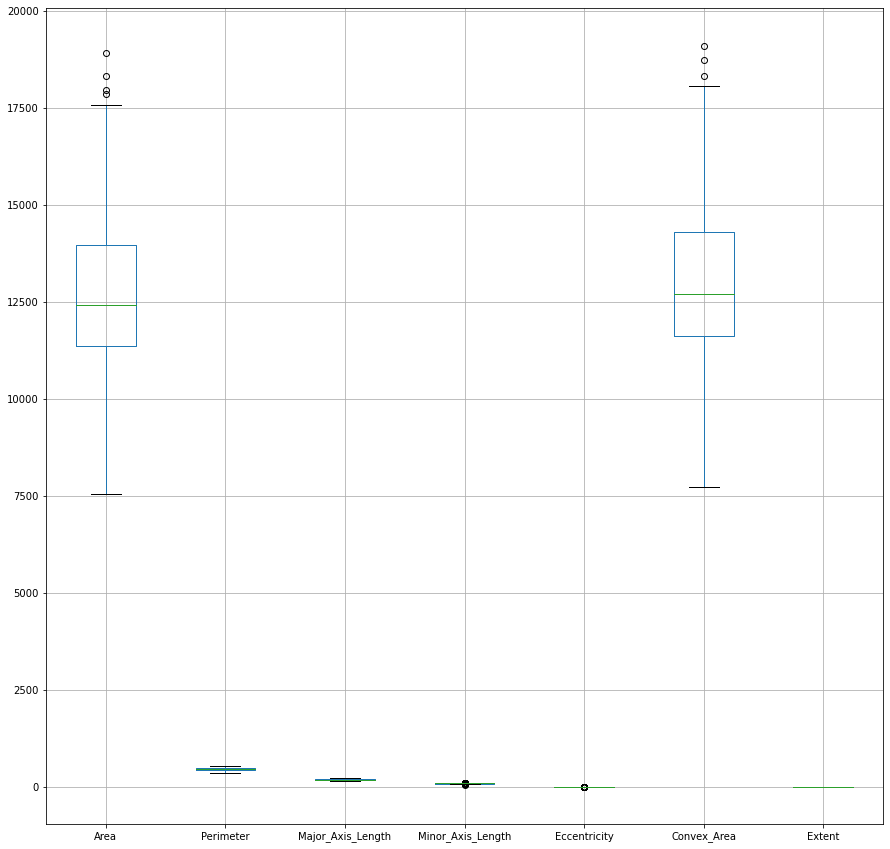

In [68]:
plt.figure(figsize =(15,15))
df.boxplot()

In [70]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


<AxesSubplot:>

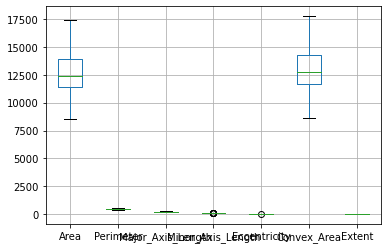

In [71]:
df.boxplot()

In [74]:
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
df['Class']= labelencode.fit_transform(df['Class'])
df['Class']

C:\Users\Admin\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       0
1       0
2       0
3       0
4       0
       ..
3804    1
3805    1
3806    1
3807    1
3808    1
Name: Class, Length: 3725, dtype: int32

In [84]:
X= df.drop(['Class'], axis =1)
X.shape

(3725, 7)

In [85]:
y=df['Class']
y.shape

(3725,)

In [75]:
from sklearn.model_selection import train_test_split

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [87]:
from sklearn.linear_model import LogisticRegression
loreg= LogisticRegression()

In [89]:
model = loreg.fit(X_train, y_train)

In [91]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [95]:
cm =confusion_matrix(y_test, y_pred)
cm

array([[372,  36],
       [ 30, 494]], dtype=int64)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       408
           1       0.93      0.94      0.94       524

    accuracy                           0.93       932
   macro avg       0.93      0.93      0.93       932
weighted avg       0.93      0.93      0.93       932



In [98]:
print(accuracy_score(y_test,y_pred))

0.9291845493562232


In [99]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
randomforest = RandomForestClassifier(n_estimators=100)
model_comp =randomforest.fit(X_train, y_train)
y_pred1=model_comp.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred1))

0.9184549356223176


In [ ]:
Comparison:
    Logistic Regression: 0.929
    Randomforest : 0.918